In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [119]:
# Store csv file in a Pandas DataFrame
df = pd.read_csv('combined_labled_k6.csv')
df.head()

,samples,joint_effort[0],joint_effort[1],joint_effort[2],joint_effort[3],joint_effort[4],joint_effort[5],cluster
0,0,1.050352,0.036084,0.153670,-0.208722,-0.226335,0.071900,0
1,1,1.040706,0.052485,0.160204,-0.204533,-0.222889,0.070273,0
2,2,1.070528,0.033901,0.198342,-0.208156,-0.228432,0.070408,0
3,3,1.078726,0.032952,0.203791,-0.208763,-0.228608,0.071877,0
4,4,1.046257,0.048101,0.215115,-0.205263,-0.223011,0.071184,0


In [120]:
y = pd.get_dummies(df.cluster, prefix='base')
y.rename(columns = {'base_0':'base_line', 'base_1':'rotation', 'base_2':'translation'}, inplace = True)
print(y.head())

   base_line  rotation  translation
0          1         0            0
1          1         0            0
2          1         0            0
3          1         0            0
4          1         0            0


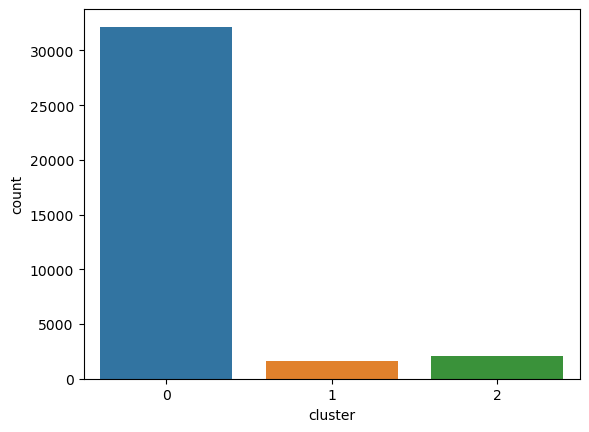

In [148]:
sns.countplot( x='cluster', data=df)

In [122]:
y= np.array(y)
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [123]:
X = df.iloc[:, 1:-1]

X=np.array(X)
print(X)

[[ 1.05035197  0.03608361  0.15366994 -0.20872176 -0.22633529  0.07190013]
 [ 1.04070593  0.05248472  0.16020391 -0.20453307 -0.22288895  0.07027318]
 [ 1.07052848  0.03390063  0.19834174 -0.20815593 -0.22843161  0.07040757]
 ...
 [ 2.18775072  0.72399379 -0.04694298 -0.1240152  -0.3555519  -0.3742596 ]
 [ 2.17323085  0.76483473 -0.16630029 -0.11638658 -0.3595942  -0.37862044]
 [ 2.21371423  0.70888995 -0.01968097 -0.12413878 -0.36091259 -0.37732746]]


In [124]:

y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [125]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=None,shuffle=False)

In [126]:
scaler = MinMaxScaler()
X1= scaler.fit_transform(X)
x1 = scaler.transform(X1)

print(X1.shape)




(35838, 6)


In [127]:
# sc = MinMaxScaler()

# y1= sc.fit_transform(y.reshape(-1,1))
# #y1 = sc.transform(y1)


print(y.shape)
print(y[3])

(35838, 3)
[1 0 0]


In [128]:
print(X1)

[[0.31531986 0.62765369 0.75464588 0.45017587 0.63641474 0.64530948]
 [0.31253532 0.62962466 0.75810344 0.45373317 0.64053097 0.64348093]
 [0.32114426 0.62739136 0.77828475 0.45065642 0.63391094 0.64363198]
 ...
 [0.64365528 0.71032188 0.64848798 0.52211411 0.48208143 0.1438633 ]
 [0.6394638  0.71522986 0.58532794 0.52859282 0.47725339 0.13896208]
 [0.65115023 0.70850681 0.66291416 0.52200916 0.47567873 0.14041528]]


In [129]:
## train dataclass TrainData(Dataset):
#from http.client import _DataType


class TrainData(Dataset):   
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        self.window=5
        
    def __getitem__(self, index):
        if index>= self.length-self.window:
            X=self.X_data[index:index+self.window,]
            Y=self.y_data[index,]
        else:
            X=self.X_data[index:index+self.window,]  
            Y=self.y_data[index+self.window,]
        
        return X,Y
        
    def __len__ (self):
        Q = len(self.X_data)
        self.length=Q-self.window+1
        return self.length

# train_data = TrainData(torch.FloatTensor(X_train), 
#                        torch.FloatTensor(y_train))

## test data  
# class TestData(Dataset):
    
#     def __init__(self, X_data,y_data):
#         self.X_data = X_data
#         self.y_data = y_data
#         self.window=5
#     def __getitem__(self, index):
#         if index>= self.length-self.window:
#             X=self.X_data[index:index+self.window]
#             Y=self.y_data[index,]

#         else:
#             X=self.X_data[index:index+self.window]  
#             Y=self.y_data[index+self.window,]
        
#         return X,Y
#     def __len__ (self):
#         Q = len(self.X_data)
#         self.length=Q-self.window+1
#         return self.length
    

#test_data = TrainData(torch.FloatTensor(X_test),torch.FloatTensor(y_test))                      

In [130]:
cs=TrainData(torch.FloatTensor(X1),torch.FloatTensor(y))
train_l=round(int(cs.__len__())*0.8)

batch_size=25
val_l=int(cs.__len__())-train_l

train_set, val_set = torch.utils.data.random_split(cs, [train_l, val_l])

train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size, drop_last=True)


for each_x, each_y in train_loader:
    print(each_x.shape)
    print(each_y.shape)
    print(type(each_x))
    print(type(each_y))
    break
    
    
val_loader = DataLoader(val_set, shuffle=True, batch_size=batch_size, drop_last=True)
for each_x, each_y in val_loader:
    print(each_x.shape)
    print(each_y.shape)
    print(type(each_x))
    print(type(each_y))
    break

torch.Size([25, 5, 6])
torch.Size([25, 3])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([25, 5, 6])
torch.Size([25, 3])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [131]:



# batch_size=25

# train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=batch_size, drop_last=True)


# val_loader = DataLoader(dataset=test_data, shuffle=True, batch_size=batch_size, drop_last=True)
# print(next(iter(train_loader))[0].shape[0])
# #print(train_loader.batch_size)
# for each_x, each_y in train_loader:
#     print(each_x.shape)
#     print(each_y.shape)
#     break
    
    

# for each_x,each_y in val_loader:
#     print(each_x.shape)
#     print(each_y.shape)
#     break

In [132]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [133]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        #print(x,h)
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden
class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(LSTMNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.lstm(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [134]:

def train(train_loader, learn_rate, hidden_dim=256, EPOCHS=5, model_type="GRU"):
    print(next(iter(train_loader))[0].shape[2])
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 3
    n_layers = 2
    # Instantiating the models
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)
    
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = time.time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.
        counter = 0
        for x, label in train_loader:
            counter += 1
            if model_type == "GRU":
                h = h.data
            else:
                h = tuple([e.data for e in h])
            model.zero_grad()
            
            out, h = model(x.to(device), h)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
            if counter%200 == 0:
                print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), avg_loss/counter))
        current_time = time.time()
        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, avg_loss/len(train_loader)))
        print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        epoch_times.append(current_time-start_time)
    print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
    return model


In [146]:
def evaluate(model, val_loader, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.time()
    for each_x,each_y in val_loader:
        inp = (each_x.to(device))
        labs = (each_y.to(device))
        h = model.init_hidden(inp.shape[0])
        # print(inp.size)
        out, h = model(inp, h)
        outputs.extend(np.argmax(out.cpu().detach().numpy(), axis=-1))#.reshape(1, -1)[0])
        targets.extend(np.argmax(each_y.cpu().numpy(), axis=-1))#.reshape(1, -1)[0])
    # print("Evaluation Time: {}".format(str(time.time()-start_time)))
    # acc_score = accuracy_score(targets, outputs)
    # model_f1_score = f1_score(targets, outputs, average='weighted')
    # print(f"The accuracy of the model is {acc_score*100}%, F1 score is {model_f1_score*100}%")
    new_targets = []
    new_outputs = []
    for i, _ in enumerate(outputs):
        tar = targets[i]
        ou = outputs[i]
        if tar == 0 and ou == 0:
            pass
        else:
            new_targets.append(tar)
            new_outputs.append(ou)
    acc_score = accuracy_score(new_targets, new_outputs)
    print(f"The accuracy of the model is {acc_score*100}%")
    return outputs, targets


In [136]:
lr = 0.001
gru_model = train(train_loader, lr, model_type="GRU")
# Lstm_model = train(train_loader, lr, model_type="LSTM")

6
Starting Training of GRU model
Epoch 1......Step: 200/1146....... Average Loss for Epoch: 0.07236240139638539
Epoch 1......Step: 400/1146....... Average Loss for Epoch: 0.066704537437181
Epoch 1......Step: 600/1146....... Average Loss for Epoch: 0.06663495687108177
Epoch 1......Step: 800/1146....... Average Loss for Epoch: 0.06500485771655803
Epoch 1......Step: 1000/1146....... Average Loss for Epoch: 0.06412448514404241
Epoch 1/5 Done, Total Loss: 0.06384821660582213
Total Time Elapsed: 2.438037872314453 seconds
Epoch 2......Step: 200/1146....... Average Loss for Epoch: 0.058862422780366616
Epoch 2......Step: 400/1146....... Average Loss for Epoch: 0.0521400178829208
Epoch 2......Step: 600/1146....... Average Loss for Epoch: 0.04972007465956267
Epoch 2......Step: 800/1146....... Average Loss for Epoch: 0.04778046348510543
Epoch 2......Step: 1000/1146....... Average Loss for Epoch: 0.04550858311215416
Epoch 2/5 Done, Total Loss: 0.04471194209635784
Total Time Elapsed: 2.4347808361053

In [147]:
gru_outputs, targets = evaluate(gru_model, val_loader, label_scalers=y_te)



The accuracy of the model is 71.76165803108809%


In [138]:
print(targets[3])

0


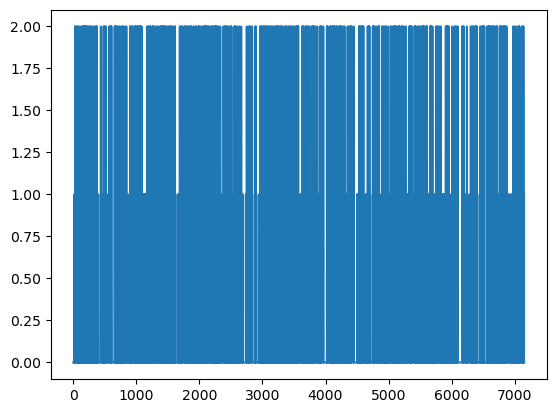

In [139]:
plt.plot( targets)

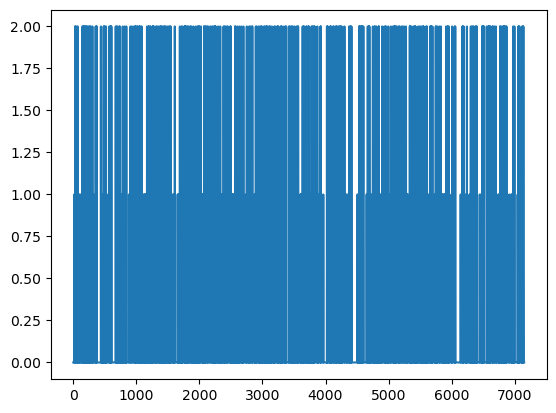

In [140]:
plt.plot(gru_outputs)

In [141]:
output=np.array(gru_outputs)
data = pd.DataFrame(output, columns = ['base','rotation','translation'])
data.head()


ValueError: Shape of passed values is (7150, 1), indices imply (7150, 3)

In [ ]:
out=np.array(targets)
dat = pd.DataFrame(out, columns = ['base1','rotation1','translation1'])
dat.head()



In [ ]:
from cmath import tanh
r=[]

res = output.max(axis=1)
print(type(res))
for i in res:
    print(i)
#     r.append (tanh(res[i]))    
plt.plot(res)

In [ ]:
data['base1'] = dat.base1
data['rotation1'] = dat.rotation1
data['translation1'] = dat.translation1
data.head()

In [ ]:
data.to_csv("results_4.csv")

In [ ]:
decoded=np.argmax(output, axis=1)
plt.plot(decoded)

In [ ]:
deco=np.argmax(targets, axis=1)
plt.plot(decoded)

In [ ]:

dat = pd.DataFrame(deco, columns = ['target'])
dat.head()

In [ ]:

dat1 = pd.DataFrame(decoded, columns = ['output'])
dat1.head()

In [ ]:
dat1['target'] = dat.target
dat1.head()

In [ ]:
dat1.to_csv("results_5.csv")